# CT4101 - Deep Learning CT 5133
# Student Name(s): Tapan Auti, Atharva Kulkarni
# Student ID(s): 20231499, 20231773

## Part 1 and 2

In [4]:
import pandas as pd
import numpy as np

# 1 Author: Atharva
# Sigmoid Function Definition


def f(z):
    return 1 / (1 + np.exp(-z))


# 1 Author: Tapan
# Calculate loss function
def loss_gradient(w, x, b):
    z = np.dot(x, w)
    y = f(z)
    loss = (-b * np.log(y) - (1 - b) * np.log(1 - y)).mean()
    gdn = np.dot(x.T, (b - y)) / b.size
    # print(b.shape)
    # print(y.shape)

    # 1 Author: Atharva
    # Normalising Gradient Descent
    grad = gdn + 300 / (2 * b.size) * np.concatenate(([0], w[1:])).T
    return loss, grad


# 1 Author: Tapan
# Training Function
def model_fit(x, b, total_iterations=5000):
    final_w = []
    label = np.unique(b)
    all_loss = np.zeros(total_iterations)

    for c in label:
        b = np.where(b == c, 1, 0)
        w = np.zeros(x.shape[1])
        for i in range(total_iterations):
            all_loss[i], grad = loss_gradient(w, x, b)
            w += 0.01 * grad
        final_w.append(w)
    return final_w, label, all_loss


# 1 Author: Atharva
# Predict Function
def predict_prob(label, w, x):
    preds = [np.argmax([f(i@j) for j in final_w]) for i in x]
    return [label[p] for p in preds]


# 1 Author: Atharva
# Calculate Accuracb of the model
def accuracy(label, w, x, b):
    acc = predict_prob(label, w, x)
    return (acc == b).mean()


    # 2 Authors: Tapan, Atharva
# Pre processing data set beer.txt
df = pd.read_csv("moons400.csv")
df2 = pd.read_csv("blobs250.csv")
# 2 Authors: Tapan, Atharva



data = np.array(df)

num_train = int(.70 * len(data))
num_test = int(0.15 * len(data))

x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_test:, :-1], data[num_test:, -1]
final_w, label, losses = model_fit(x_train, y_train)
print(f"Test Accuracy moons  : {accuracy(label, final_w, x_test, y_test):.6f}")


data = np.array(df2)

num_train = int(.70 * len(data))
num_test = int(0.15 * len(data))

x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_test:, :-1], data[num_test:, -1]
final_w, label, losses = model_fit(x_train, y_train)
print(f"Test Accuracy blobs : {accuracy(label, final_w, x_test, y_test):.6f}")
print(final_w)



<ipython-input-4-0a030c496da9>:17: RuntimeWarning: divide by zero encountered in log
  loss = (-b * np.log(y) - (1 - b) * np.log(1 - y)).mean()
<ipython-input-4-0a030c496da9>:17: RuntimeWarning: invalid value encountered in multiply
  loss = (-b * np.log(y) - (1 - b) * np.log(1 - y)).mean()
<ipython-input-4-0a030c496da9>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
Test Accuracy moons  : 0.514706
Test Accuracy blobs : 0.492958
[array([-3.85353573e-02,  1.20085164e+18,  3.06224919e+17]), array([-3.85353573e-02,  1.20085164e+18,  3.06224919e+17])]


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# Display plots inline and change default figure size
%matplotlib inline

In [12]:
df = pd.read_csv("moons400.csv")
df2 = pd.read_csv("blobs250.csv")

In [13]:
y = df['Class'].values
y2 = df2['Class'].values
del df['Class']   
X = df.values   
del df2['Class']   
X2 = df2.values   

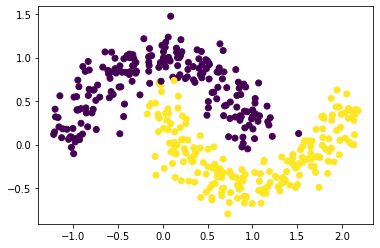

In [15]:
plt.scatter(X[:,0], X[:,1], c=y) 


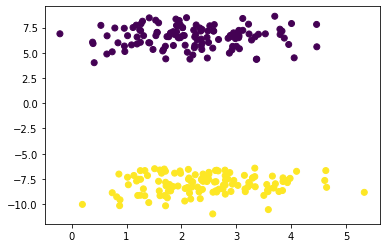

In [16]:
plt.scatter(X2[:,0], X2[:,1], c=y2)   

## Part 3
